<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/classificaton_of_news_wires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import  STOPWORDS
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding
%matplotlib inline

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chiebukar","key":"608f4279ecac88d5d34835c38326b695"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c fake-news

 53% 5.00M/9.42M [00:00<00:00, 31.3MB/s]
100% 9.42M/9.42M [00:00<00:00, 46.2MB/s]
 46% 17.0M/37.0M [00:00<00:00, 36.0MB/s]
100% 37.0M/37.0M [00:00<00:00, 83.5MB/s]
  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 42.1MB/s]


In [10]:
!ls -d $PWD/*

/content/kaggle.json  /content/submit.csv    /content/train.csv.zip
/content/sample_data  /content/test.csv.zip


In [11]:
!unzip \*.zip && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [12]:
!ls -d $PWD/*

/content/kaggle.json  /content/submit.csv  /content/train.csv
/content/sample_data  /content/test.csv


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
test_label = pd.read_csv('/content/submit.csv')

In [14]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
train_df = train_df[['text', 'label']]
train_df.head(3)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1


In [16]:
train_df.isna().sum()

text     39
label     0
dtype: int64

In [17]:
train_df.dropna(inplace=True)
train_df.isna().sum()

text     0
label    0
dtype: int64

In [18]:
train_data = train_df['text']
train_label = train_df['label']

In [19]:
test_df.head(3)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [20]:
test_label.head(3)

,id,label
0,20800,0
1,20801,1
2,20802,0


In [21]:
len(test_df), len(test_label)

(5200, 5200)

In [22]:
test_df['text'].isna().sum()

7

In [23]:
test_df['label'] = test_label['label']
test_df.head(3)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0


In [24]:
new_test_df = test_df[['text', 'label']]
new_test_df.head(3)

,text,label
0,"PALO ALTO, Calif. — After years of scorning...",0
1,Russian warships ready to strike terrorists ne...,1
2,Videos #NoDAPL: Native American Leaders Vow to...,0


In [25]:
new_test_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
new_test_df.isna().sum()

text     0
label    0
dtype: int64

In [27]:
len(new_test_df)

5193

In [28]:
test_data = new_test_df['text']
test_label =new_test_df['label']

In [29]:
len(train_data), len(train_label), len(test_data), len(test_label)

(20761, 20761, 5193, 5193)

In [30]:
stopwords = set(STOPWORDS)
clean_train_data = train_data.apply(lambda x: ''.join([word for word in x.split() if word not in (stopwords)]))
len(clean_train_data)

20761

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [32]:
def tokenize(data, MAX_NUM_WORDS = 25000, MAX_SEQUENCE_LENGTH = 5000):
  tokenizer = Tokenizer(num_words = MAX_NUM_WORDS)
  tokenizer.fit_on_texts(data)
  sequences = tokenizer.texts_to_sequences(data)
  word_index = tokenizer.word_index
  num_words = min(MAX_NUM_WORDS, len(word_index))
  data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'pre',truncating = 'pre', value = 0)
  return data, num_words

In [33]:
train_data, num_words = tokenize(clean_train_data)
test_data, test_data_nums = tokenize(test_data)

In [34]:
MNB_model = MultinomialNB(alpha = 1.0, class_prior = None, fit_prior = True)
MNB_model.fit(train_data, train_label)
MNB_model.score(test_data, test_label)

0.4833429616791835

In [35]:
MNB_cm = confusion_matrix(test_label, MNB_model.predict(test_data))

Text(0.5, 24.0, 'predicted')

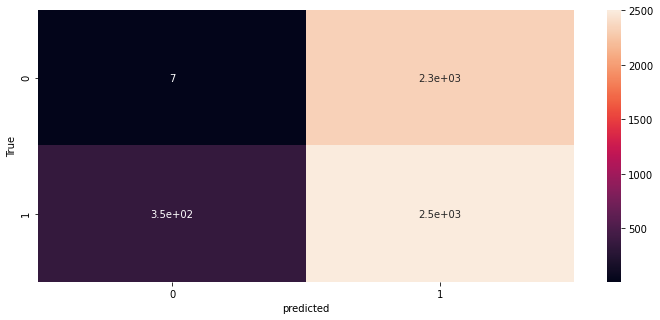

In [36]:

plt.figure(figsize =(12,5))
sn.heatmap(MNB_cm, annot=True)
plt.ylabel('True')
plt.xlabel('predicted')

In [37]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size  = 0.2)

In [38]:
def build_model():
  model = Sequential()
  model.add(Embedding(num_words, 300))
  model.add(Conv1D(64, 5, activation = 'relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics =['accuracy'])
  return model



In [39]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, epochs = 8, validation_data = (x_val, y_val), batch_size = 128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         7500000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          96064     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 7,600,289
Trainable params: 7,600,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
130/130 [==============================] - 84s 585ms/step - loss: 0.3891 - accuracy: 0.8269 - val_loss

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

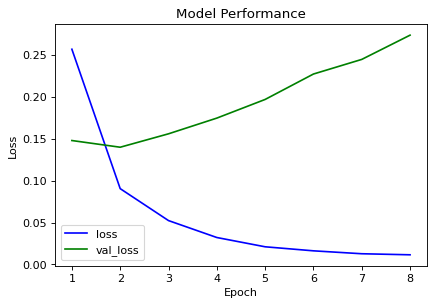

In [41]:
plt.figure(dpi = 80)
plt.plot(epochs, loss, 'b', label = 'loss')
plt.plot(epochs, val_loss, 'g-', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Performance')
plt.legend()


In [56]:
CNN_model = build_model()
CNN_model.summary()
CNN_model.fit(train_data, train_label, epochs =1, batch_size = 64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         7500000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          96064     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 7,600,289
Trainable params: 7,600,289
Non-trainable params: 0
_________________________________________________________________
325/325 [==============================] - 89s 271ms/step - loss: 0.3206 - accuracy: 0.8557


In [ ]:
results =CNN_model.evaluate(test_data, test_label) 
results

In [ ]:
print('Testing Accuracy: {:.2f}%'.format(CNN_model.evaluate(test_data, test_label) * 100))

In [51]:
CNN_cm = confusion_matrix(test_label, CNN_model.predict(test_data).round(), normalize='pred')

Text(0.5, 24.0, 'predicted')

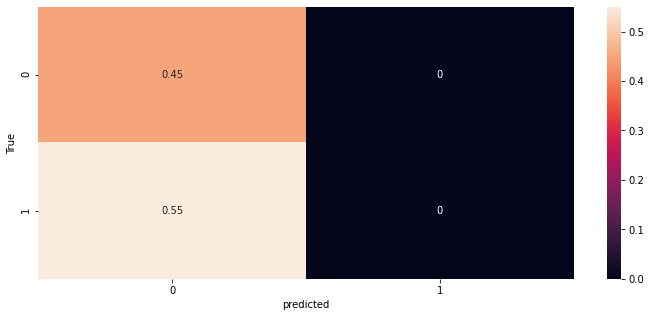

In [52]:
plt.figure(figsize =(12,5))
sn.heatmap(CNN_cm, annot=True)
plt.ylabel('True')
plt.xlabel('predicted')